In [486]:
import pandas as pd
import numpy as np
import importlib

import os
import sys

sys.path.append(os.path.abspath(os.path.join('..','src')))

import eda
importlib.reload(eda)

import warnings
warnings.filterwarnings('ignore')

In [487]:
# load the data
ed_anal = eda.EDA('data.csv')
df = ed_anal.get_dataframe()
# df.head()

In [488]:
# over view of the dataframe
ed_anal.over_view()

Shape: (95662, 16)
Information on each columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       9

In [489]:
# unique number in each categories
ed_anal.unique_values()

TransactionId : 95662
BatchId : 94809
AccountId : 3633
SubscriptionId : 3627
CustomerId : 3742
CurrencyCode : 1
CountryCode : 1
ProviderId : 6
ProductId : 23
ProductCategory : 9
ChannelId : 4
Amount : 1676
Value : 1517
TransactionStartTime : 94556
PricingStrategy : 4
FraudResult : 2


- The dataset contain the transaction of 3742 cutomers which some might share account numbers. The data is collected specifically from one country and contain one currency code. 
- Transactions are categorized into batch.
- The unique number of Amount and Value is negelect because this are numerical features.
- Some users have the same tranaction dates.

In [490]:
# remove country and currency code and change datatype of features
ed_anal.change_datatype()

New shape of the dataframe: (95662, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  category           
 3   SubscriptionId        95662 non-null  category           
 4   CustomerId            95662 non-null  category           
 5   ProviderId            95662 non-null  category           
 6   ProductId             95662 non-null  category           
 7   ProductCategory       95662 non-null  category           
 8   ChannelId             95662 non-null  category           
 9   Amount                95662 non-null  float64            
 10  Value                 95662 non-null  int64              
 11  TransactionStartTime  95662

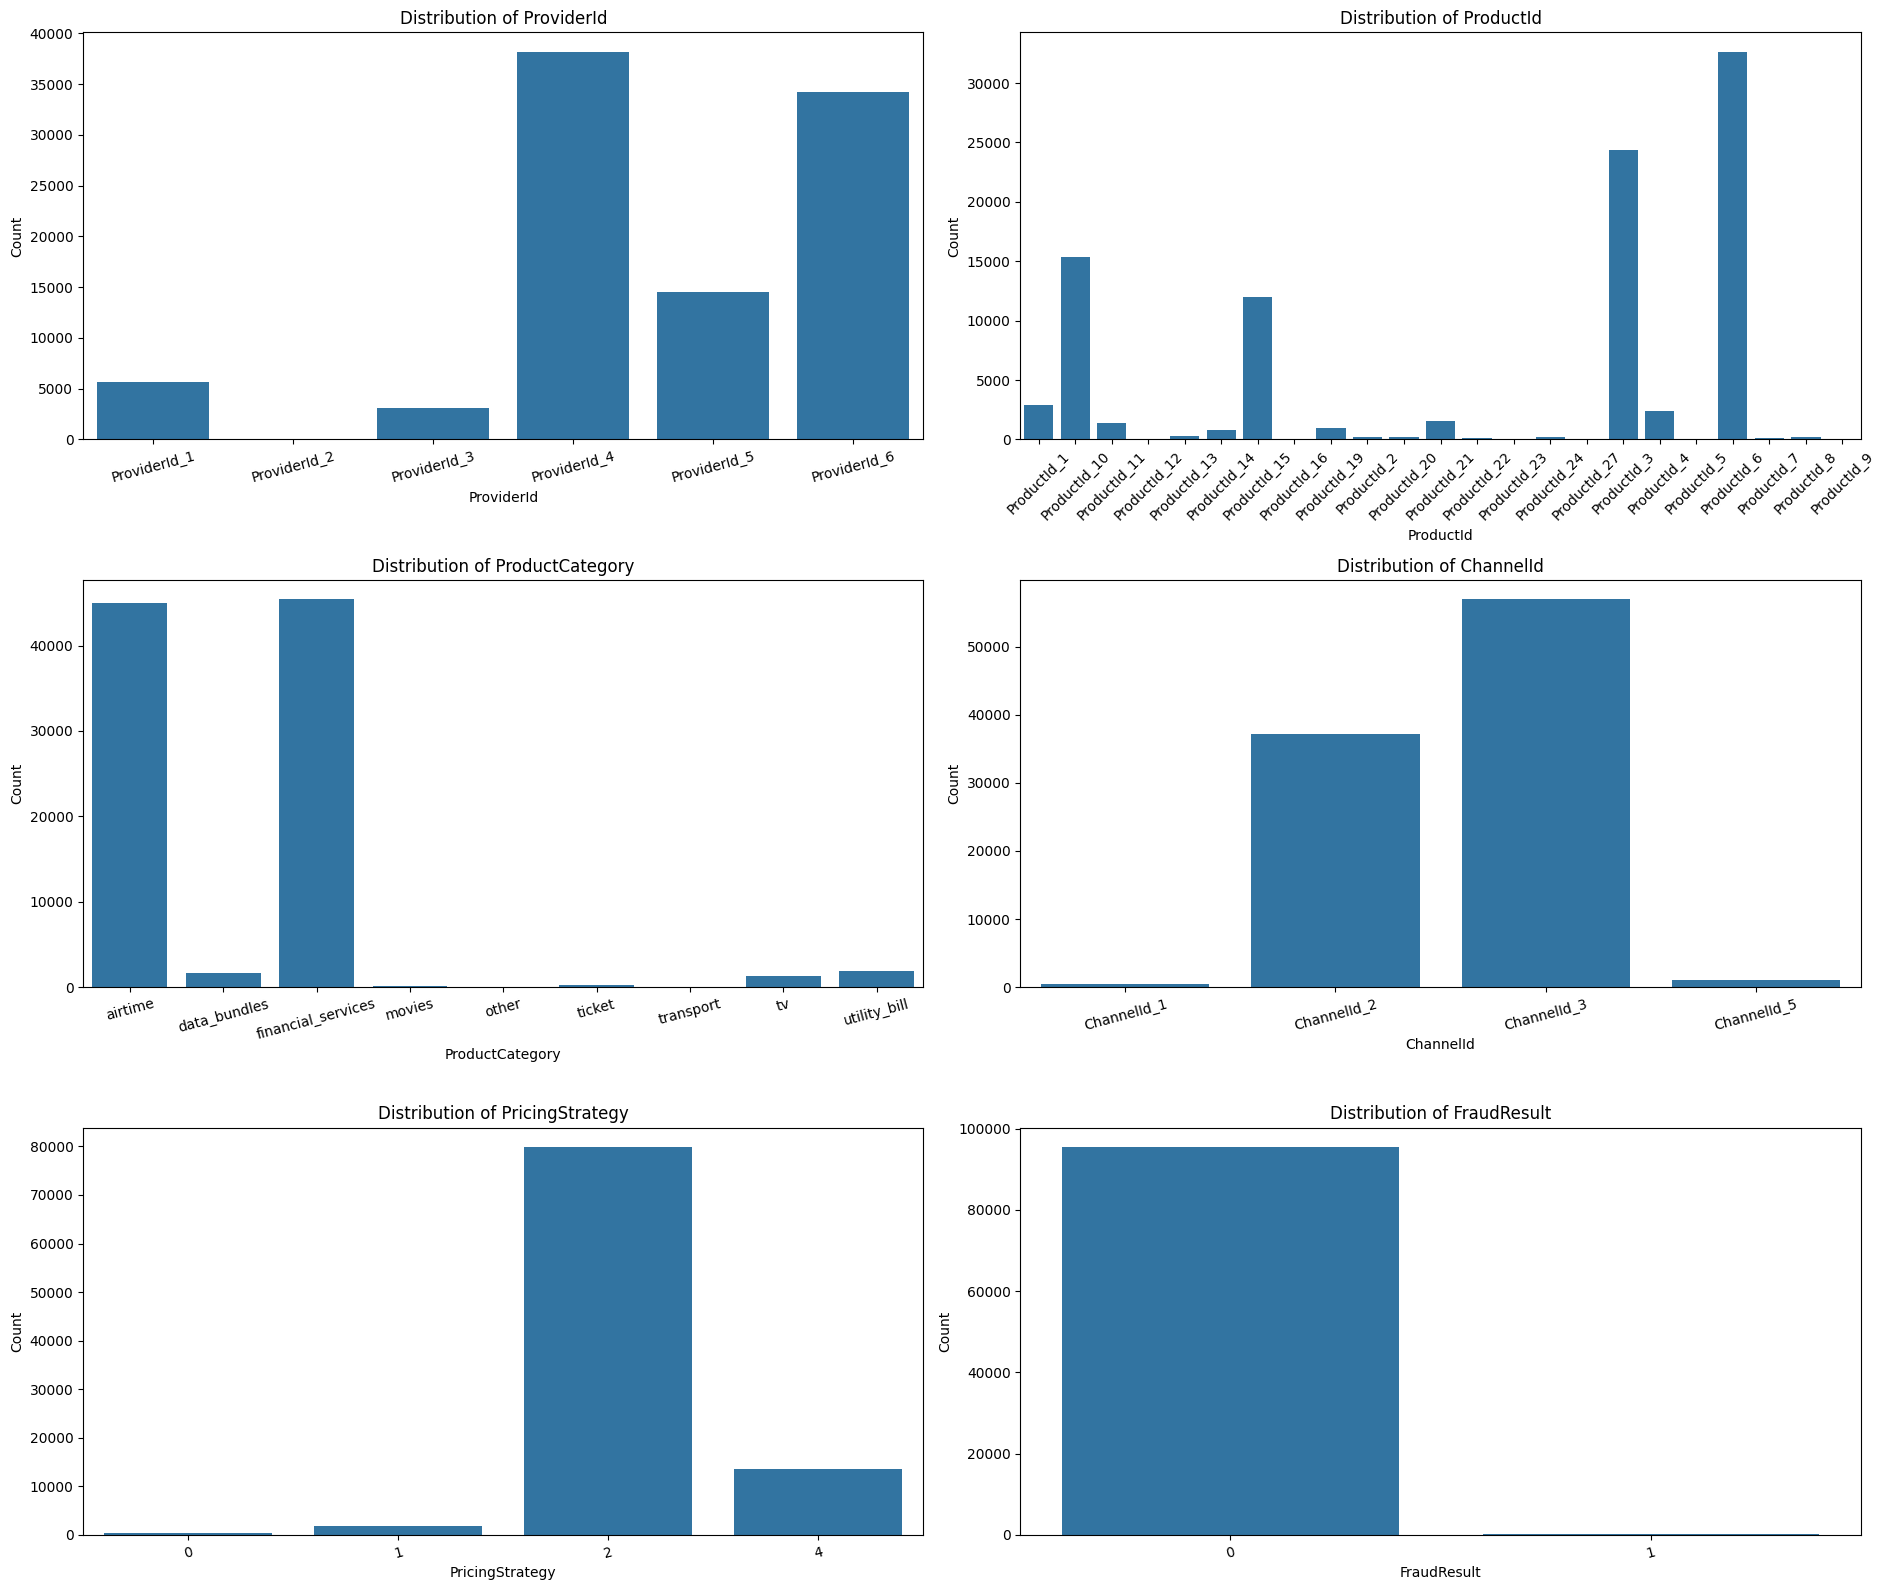

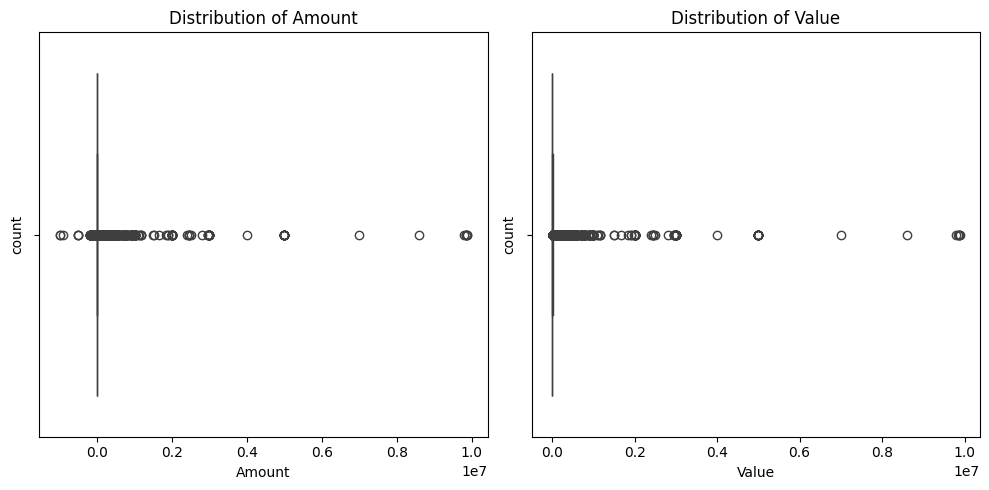

In [491]:
# distribution of features
ed_anal.distribution_stats_category()
ed_anal.distribution_stats_numerical()

In [492]:
# correlation between numerical features 
ed_anal.corr_relation()       # only Amount and Value are numerical category

          Amount     Value
Amount  1.000000  0.989692
Value   0.989692  1.000000


- Of course Amount and Value would be correlated because value is the absolute value of amount.

## Further Analysis of each features

> Does each batch have one custumer transaction?

In [493]:
# customer per batch
ed_anal.feature_analysis(1)

BatchId
BatchId_32316     2
BatchId_100009    1
BatchId_99999     1
BatchId_100       1
BatchId_1000      1
                 ..
BatchId_99975     1
BatchId_99976     1
BatchId_99977     1
BatchId_99978     1
BatchId_99979     1
Name: CustomerId, Length: 94809, dtype: int64


Only one batch contain two customers per batch while all the others have one customers.

Thus batch is the transction of one specific customer except Batch_32316.

In [494]:
# to further see Batch_32316
df.query('BatchId == "BatchId_32316"')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
87956,TransactionId_139714,BatchId_32316,AccountId_1913,SubscriptionId_3495,CustomerId_2307,UGX,256,ProviderId_6,ProductId_6,financial_services,ChannelId_3,500.0,500,2019-02-07T15:07:28Z,2,0
87960,TransactionId_100464,BatchId_32316,AccountId_1913,SubscriptionId_3495,CustomerId_2307,UGX,256,ProviderId_6,ProductId_6,financial_services,ChannelId_3,500.0,500,2019-02-07T15:13:56Z,2,0
87972,TransactionId_41900,BatchId_32316,AccountId_1913,SubscriptionId_3495,CustomerId_2307,UGX,256,ProviderId_6,ProductId_6,financial_services,ChannelId_3,500.0,500,2019-02-07T15:29:37Z,2,0
87996,TransactionId_139442,BatchId_32316,AccountId_1913,SubscriptionId_3495,CustomerId_2307,UGX,256,ProviderId_6,ProductId_6,financial_services,ChannelId_3,500.0,500,2019-02-07T15:45:04Z,2,0
94390,TransactionId_125847,BatchId_32316,AccountId_4841,SubscriptionId_375,CustomerId_2635,UGX,256,ProviderId_6,ProductId_6,financial_services,ChannelId_3,50.0,50,2019-02-12T07:25:47Z,2,0


> What is the maximum and mininum number of transcation per batch?

In [495]:
# maximum and minimum number of transaction per batch
ed_anal.feature_analysis(2)

Maximum number of transaction per batch: 28
Minimum number of transaction per batch: 1


> Transaction per Customer

In [496]:
# maximum and minimum number of transaction per customer
ed_anal.feature_analysis(3)

Maximum number of transaction per customer: 4091
Minimum number of transaction per customer: 1


> Does each account have one customer or more?

In [497]:
# customer per account
ed_anal.feature_analysis(4)

Maximum number of customers per account: 2577
Minimum number of customers per account: 1


In [498]:
# further on accounts
ed_anal.feature_analysis(5)

                BatchId  CustomerId  SubscriptionId
AccountId                                          
AccountId_4841    30893        2577               2
AccountId_4249     4457          56               1
AccountId_4840     1738        1723               1
AccountId_3206     1103           1               1
AccountId_318      1064           1               1
...                 ...         ...             ...
AccountId_1981        1           1               1
AccountId_1988        1           1               1
AccountId_947         1           1               1
AccountId_948         1           1               1
AccountId_1002        1           1               1

[3633 rows x 3 columns]


Account_4841 has the largest number of batches, customers and subscriptions.

> The association of product id with product category.

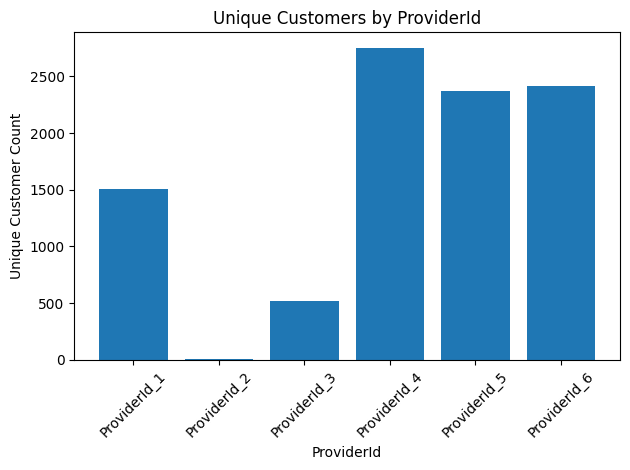

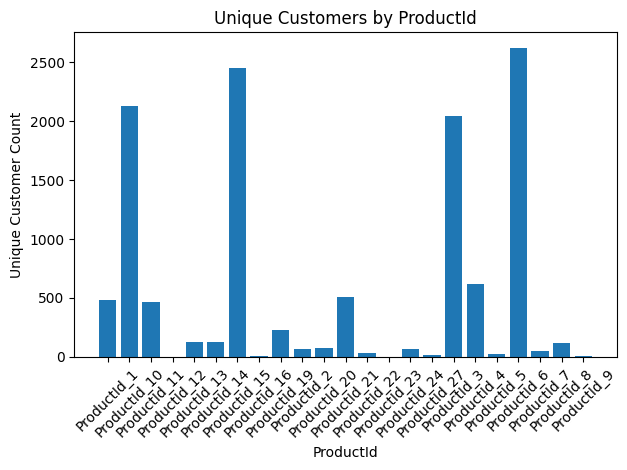

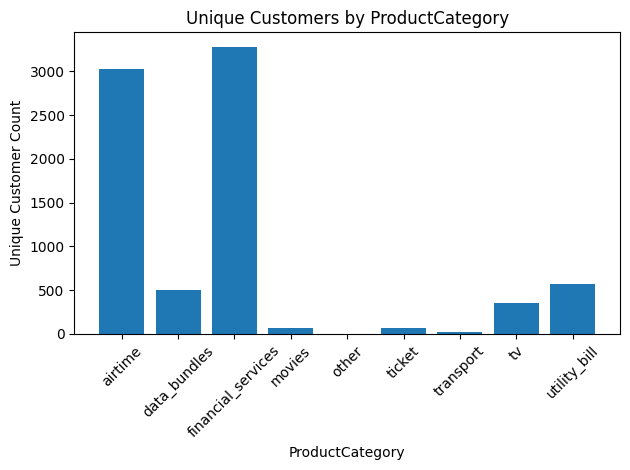

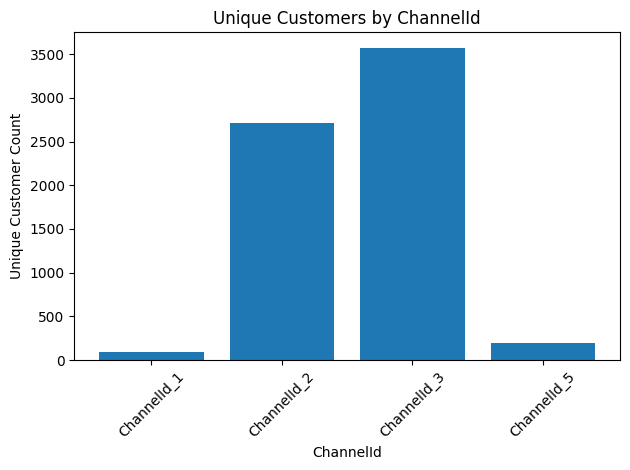

In [499]:
# which product id stands for product category
ed_anal.feature_analysis(6)

> The association between provider id, product id and product category.

In [500]:
# ProvideId, ProductId and ProductCategory
ed_anal.feature_analysis(7)

              ProductId  ProductCategory
ProviderId                              
ProviderId_1         20                8
ProviderId_2          6                3
ProviderId_3         20                9
ProviderId_4         16                6
ProviderId_5         20                8
ProviderId_6         20                8


A provider might give more than one product(service).

In [501]:
ed_anal.close_log()